# Analyzing Customer Churn in Telco
*by Xavier Torres Fatsini*

Using [Kaggle's public dataset](https://www.kaggle.com/blastchar/telco-customer-churn) we'll perform the following actions:

1. [Data upload](#section1)
1. [Data understanding and cleaning](#section2)
1. [Basic EDA (Exploratory Data Analysis)](#section3)
1. [Model selection and model testing](#section4)

---

![image_not_available](https://miro.medium.com/max/1664/1*k0aH2ikjVKpXNOIDFKXdTg.png)


## <a name="section1"> 1. Data upload </a>

Let's first import the main libraries we will be needing for DataFrame manipulation, i.e. pandas and numpy. If we need any other library further on, we'll import on the fly. After that, we can read the file we downloaded from Kaggle to feed our project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

Ok, looks like the dataset is correctly uploaded, and we have a dataset with 7043 rows and 21 columns

## <a name="section2"> 2. Data understanding and cleaning </a>

Before strating any Data Science project, it's extremely important to read all related documentation. It will avoid a lot of future misunderstandig and errors. So let's take a look at the description of the each column in our dataset:

- **customerID**: nothing to say here, just customer ID
- **gender**: Whether the customer is a male or a female
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not (Yes, No)
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned or not (Yes or No)

The first column, *customerID*, is just a row identifier, so no insights from this feature can be extracted. The last column, *Churn*, is going to be our **dependant variable**: The one we will try to be explained or predicted by a combination of the rest of the features.

Let's start by checking the type of each column, and whether we have *missing* on *NaN* values to treat them. We'll use  `dtypes`, `isna()` and `isnull()` to achieve that:


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have been quite lucky as we don't need to treat *null* nor *NaN* data in our dataset, so we'll keep going on with further analysis and understanding of the dataset.

There is only one strange issue with this data. Why *TotalCharges* is *object* type? I should be float64... Let's get deeper into that. 

In [7]:
df["TotalCharges"].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

We see here that the 'top' values are blank, whith some white space maybe, and dtype as a string/object, so that's what must be creating the confusion. There are 11 blanks in the dataset. 

In [8]:
df.loc[df["TotalCharges"] == " "]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

We note that those 11 rows without *TotalCharges* do also have the *tenure* in zero months. Let's check if indeed **all** the rows with 0 *tenure* are the ones with blank *TotalCharges*, that would make sense.

In [9]:
df.loc[(df["tenure"] == 0) & (df["TotalCharges"] == " ")]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

Cool, we can see that those with 0 tenure do not have *TotalCharges*. So let's assign zeros to those rows in the *TotalCharges* column, and then try to change column type to *float*.

In [10]:
df.loc[df["TotalCharges"] == " ", "TotalCharges"] = "0"

In [11]:
df.loc[(df["tenure"] == 0) & (df["TotalCharges"] == "0")]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55             0    No  
753                Mailed check          20.25             0    No  
936                Mailed check          80.85             0    No  
1082               Mailed check          25.75             0    No  
1340    Credit card (automatic)          56.05             0    No  
3331               Mailed check          19.85             0    No  
3826               Mailed check          25.35             0    No  
4380               Mailed check          20.00             0    No  
5218               Mailed check          19.7

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [13]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [14]:
df["TotalCharges"].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

Great! We have transformed the *TotalCharges* column into a *float* type variable and we can start working with EDA.

## <a name="section3"> 3. Basic EDA (Exploratory Data Analysis)</a>

In this section we are going to address basic DataFrame manipulation and satistics to see at first glance the distrubution of each feature and use of the `groupby` function to see how the dependant variable *Churn* behaves.

Let's first use `describe` and and after `groupby` and then anañyze the results.


In [15]:
df.describe()   #describes numerical variables

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [16]:
df.describe(include='object')  #describes categorical variables using the 'include' property

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     2027-CWDNU   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7043              7043  7043  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4171              2365  5174

What about correlation between numerical variables? Let's check that using `corr()`.

In [17]:
df.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000

Obviously, there's high correlation between *tenure* months and *TotalCharges*, but what we want is to see correlation between the different independent variables and **_Churn_**. So what we are going to do is try to create a function we will use for every column to change the value "Yes" into 1, "No" into 0 and a third categorical value into 2. 

First of all, ...how many unique values has each column? Let's check:

In [18]:
for col in df:
    if (col != "customerID"):
        if df[col].dtype == "object":
            total_uniques= df[col].nunique()
            uniques_list = set(df[col])
            print (f"{col}, uniques= { total_uniques}, list = {uniques_list}")

gender, uniques= 2, list = {'Female', 'Male'}
Partner, uniques= 2, list = {'No', 'Yes'}
Dependents, uniques= 2, list = {'No', 'Yes'}
PhoneService, uniques= 2, list = {'No', 'Yes'}
MultipleLines, uniques= 3, list = {'No', 'No phone service', 'Yes'}
InternetService, uniques= 3, list = {'No', 'DSL', 'Fiber optic'}
OnlineSecurity, uniques= 3, list = {'No', 'No internet service', 'Yes'}
OnlineBackup, uniques= 3, list = {'No', 'No internet service', 'Yes'}
DeviceProtection, uniques= 3, list = {'No', 'No internet service', 'Yes'}
TechSupport, uniques= 3, list = {'No', 'No internet service', 'Yes'}
StreamingTV, uniques= 3, list = {'No', 'No internet service', 'Yes'}
StreamingMovies, uniques= 3, list = {'No', 'No internet service', 'Yes'}
Contract, uniques= 3, list = {'Month-to-month', 'One year', 'Two year'}
PaperlessBilling, uniques= 2, list = {'No', 'Yes'}
PaymentMethod, uniques= 4, list = {'Credit card (automatic)', 'Electronic check', 'Bank transfer (automatic)', 'Mailed check'}
Churn, uni

For these columns and those unique value lists, then, let's create a function that changes  a "No" with a 0, a "Yes" will become 1 and any other value, will have a 2 instead. We are leaving aside *customerId*, *InternetService*, *Contract* and *PaymentMethod*. We'll treat them later on.

In [19]:
def change_category(col):
    if (col != "customerID") & (col != "InternetService")  & (col != "Contract") & (col != "PaymentMethod"):
        if df[col].dtype == "object":
            df[col].replace(('Male','Female'), ("0", "1"), inplace=True)    # works for gender, assigning strings (we're still working with object type columns...)
            df[col].replace(('No','Yes','No internet service'), ("0", "1", "2"), inplace=True)  # works for other columns except MultipleLines
            df[col].replace(('No','Yes','No phone service'), ("0", "1", "2"), inplace=True)  # works for other columns
            df[col] = df[col].astype(int)    # change variable type from string to int
            
          

In [20]:
for col in df:
        change_category(col)
        

In [21]:
df.head(5)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0             0              2             DSL               0  ...   
1             1              0             DSL               1  ...   
2             1              0             DSL               1  ...   
3             0              2             DSL               1  ...   
4             1              0     Fiber optic               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month                1           Electronic check          29.85   
1        One year                0               Mailed check          56.95   
2  Month-to-month                1               Mailed check          53.85   
3        One year                0  Bank transfer (automatic)          42.30   
4  Month-to-month                1           Electronic check          70.70   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1  
3       1840.75      0  
4        151.65      1  

[5 rows x 21 columns]

In [22]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

Ok, now we are ready to crate the correlation matrix with most of the columns in out dataset. 

In [23]:
df.corr()

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000       0.001874  0.001808   -0.010517 -0.005106   
SeniorCitizen     0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner           0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents       -0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure           -0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService      0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines     0.000485       0.099883  0.090981   -0.016875  0.242279   
OnlineSecurity    0.003429      -0.210897  0.081850    0.190523  0.145298   
OnlineBackup      0.002032      -0.152780  0.087055    0.162445  0.178651   
DeviceProtection -0.005092      -0.157095  0.094451    0.156439  0.178649   
TechSupport      -0.000985      -0.223770  0.069072    0.180832  0.144459   
StreamingTV      -0.001156      -0.130130  0.080127    0.140395  0.136145   
StreamingMovies   0.000191      -0.120802  0.075779    0.125820  0.140781   
PaperlessBilling  0.011754       0.156530 -0.014877   -0.111377  0.006152   
MonthlyCharges    0.014569       0.220173  0.096848   -0.113890  0.247900   
TotalCharges      0.000080       0.103006  0.317504    0.062078  0.826178   
Churn             0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
gender                0.006488       0.000485        0.003429      0.002032   
SeniorCitizen         0.008576       0.099883       -0.210897     -0.152780   
Partner               0.017706       0.090981        0.081850      0.087055   
Dependents           -0.001762      -0.016875        0.190523      0.162445   
tenure                0.008448       0.242279        0.145298      0.178651   
PhoneService          1.000000      -0.691070        0.125353      0.150338   
MultipleLines        -0.691070       1.000000       -0.235021     -0.210372   
OnlineSecurity        0.125353      -0.235021        1.000000      0.751661   
OnlineBackup          0.150338      -0.210372        0.751661      1.000000   
DeviceProtection      0.138755      -0.200463        0.749040      0.740604   
TechSupport           0.123350      -0.232155        0.791225      0.754095   
StreamingTV           0.171538      -0.202414        0.701976      0.720671   
StreamingMovies       0.165205      -0.195815        0.704984      0.716700   
PaperlessBilling      0.016505       0.108230       -0.334003     -0.262402   
MonthlyCharges        0.247398       0.146153       -0.621227     -0.538454   
TotalCharges          0.113214       0.250628       -0.154380     -0.086220   
Churn                 0.011942       0.019423       -0.332819     -0.291449   

                  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
gender                   -0.005092    -0.000985    -0.001156         0.000191   
SeniorCitizen            -0.157095    -0.223770    -0.130130        -0.120802   
Partner                   0.094451     0.069072     0.080127         0.075779   
Dependents                0.156439     0.180832     0.140395         0.125820   
tenure                    0.178649     0.144459     0.136145         0.140781   
PhoneService              0.138755     0.123350     0.171538         0.165205   
MultipleLines            -0.200463    -0.232155    -0.202414        -0.195815   
OnlineSecurity            0.749040     0.791225     0.701976         0.704984   
OnlineBackup              0.740604     0.754095     0.720671         0.716700   
DeviceProtection          1.000000     0.767970     0.763279         0.766821   
TechSupport               0.767970     1.000000     0.737578         0.737123   
StreamingTV               0.763279     0.737578     1.000000         0.809608   
StreamingMovies           0.766821     0.737123     0.809608         1.000000   
PaperlessBilling         -0.276326    -0.310749    -0.203907        -0.21181

Difficult to see insights in such a dense table, right?

Let's create a Heat map for better understanding. For these we will need to import the `pyplot` library (more info [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)) and `seaborn` for a better visualization of correlation (documentation [here](https://seaborn.pydata.org/)).

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

(17.0, 0.0)

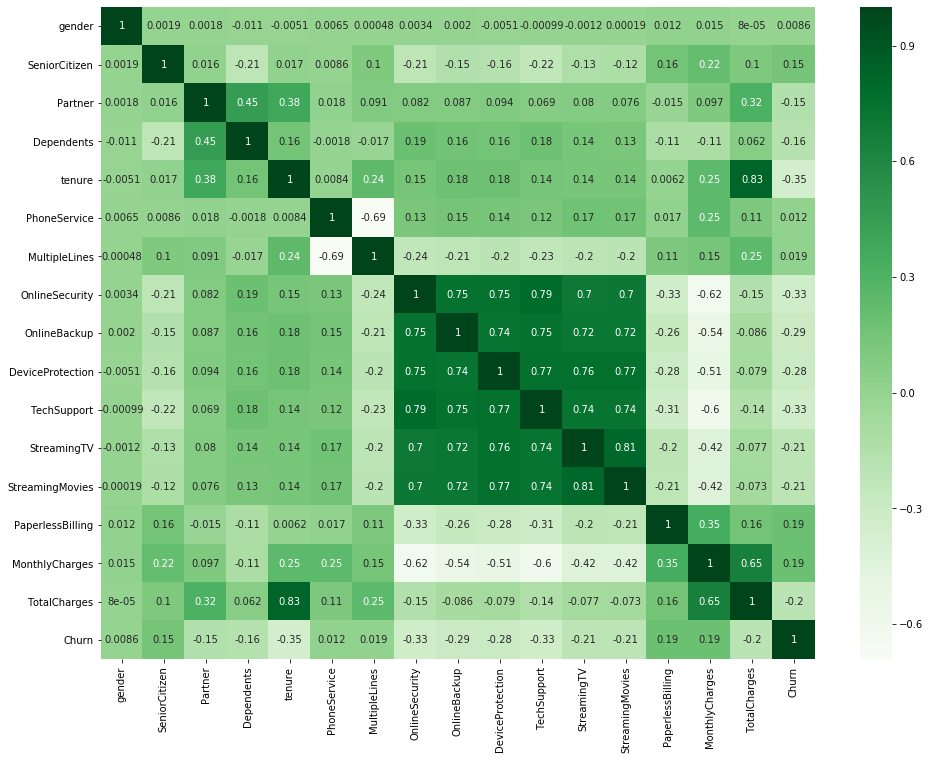

In [25]:
plt.figure(figsize=(16,12))
ax = plt.subplot(111)
sns.heatmap(df.corr(), annot=True, cmap="Greens", ax=ax)
bottom, top = ax.get_ylim()             # this fixes a bug where+ first and last columns were not visualized correctly
ax.set_ylim(bottom + 0.5, top - 0.5)

Unluckily we can't see a strong correlation between any variable and Churn. We see weak correlations with churn like *tenure*, *OnlineSecurity*, or *TechSupport*, but nothing extremely significant to highlight.
Let's now see some analysis of Churn using `groupby`.

In [26]:
for col in df:
        aggregate = df.groupby([col, "Churn"]).size()   # size of observation for each category
        print(aggregate)
        print("_________________________________________")

customerID  Churn
0002-ORFBO  0        1
0003-MKNFE  0        1
0004-TLHLJ  1        1
0011-IGKFF  1        1
0013-EXCHZ  1        1
                    ..
9987-LUTYD  0        1
9992-RRAMN  1        1
9992-UJOEL  0        1
9993-LHIEB  0        1
9995-HOTOH  0        1
Length: 7043, dtype: int64
_________________________________________
gender  Churn
0       0        2625
        1         930
1       0        2549
        1         939
dtype: int64
_________________________________________
SeniorCitizen  Churn
0              0        4508
               1        1393
1              0         666
               1         476
dtype: int64
_________________________________________
Partner  Churn
0        0        2441
         1        1200
1        0        2733
         1         669
dtype: int64
_________________________________________
Dependents  Churn
0           0        3390
            1        1543
1           0        1784
            1         326
dtype: int64
______________

#### Now let's create some histograms to see distribution for each feature.

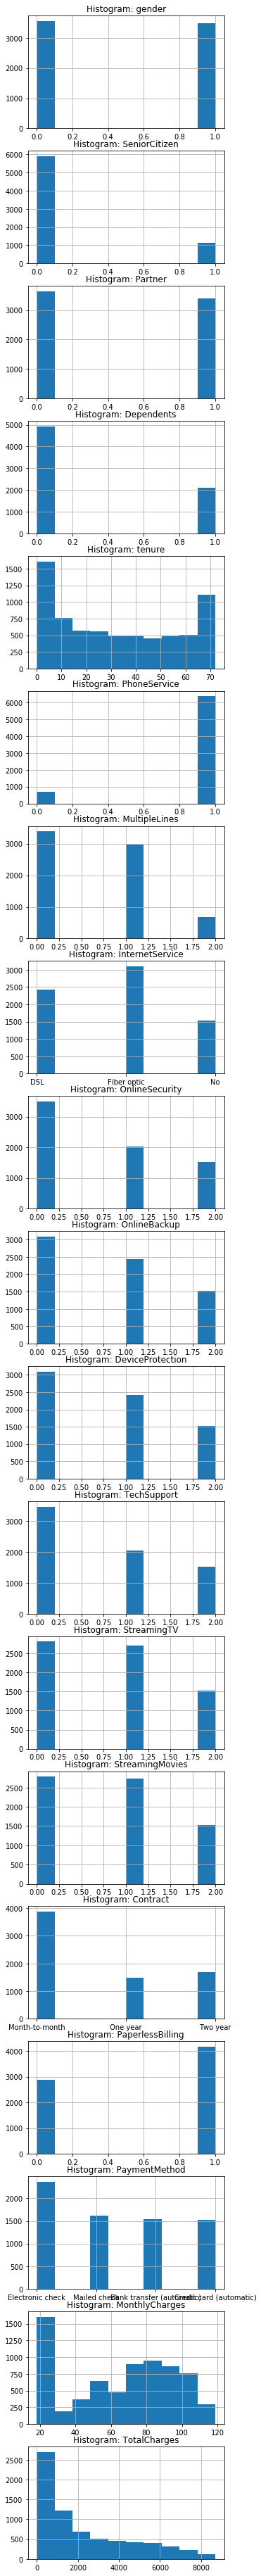

In [27]:
import matplotlib.pyplot as plt

df_columns= list(df.columns.values)
num_cols = np.size(df,1)
plt.figure(figsize=(5,70))
for i in range(1,20):
    ax= plt.subplot(20,1,i)
    ax.title.set_text('Histogram: '+ df_columns[i])
    df[df_columns[i]].hist()


**Ok, we can collect some insights now from all we have seen:**

- Looks like high number of churns if not having partner or dependants.
- Looks like high number of churns if senior.
- Looks like low number of churns if have phone service.
- Nobody churned in their first month
- Those having Fiber optic, more likely to churn compared to DSL owners and No InternetService
- Those not having OnlineSecurity, OnlineBackup, TechSupport and DeviceProtection, more likely to churn compared to those who do have.
- Those having a contract month-to-month are more likely to churn compared to yearly or two-yearly contracts.
- Those having PayperlessBilling are more likely to churn compared to those who don't.




## <a name="section4"> 4. Model selection and model testing</a>

We need a supervised learning algorithm to **classify** a categorical variable like *Churn*. We choose now a the Decision Tree algorithm to show first results and score of this model. Additionally we should try other model and algorithms (SVM, Random forests, etc.) and see which is the optimal algorithm to use in our case.

For a better undertanding of the Decision Tree Algorithm, here's a flow chart:

![image_not_available](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

---

![image_not_available](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png)

First of all, we will need to make some encoding and we have to change all different values of "InternetService", "Contract" and "PaymentMethod" to integers, so that the `fit` function in our model works properly.

In [28]:
df.loc[df["InternetService"] == "No", "InternetService"] = "0"
df.loc[df["InternetService"] == "DSL", "InternetService"] = "1"
df.loc[df["InternetService"] == "Fiber optic", "InternetService"] = "2"

df.loc[df["Contract"] == "Month-to-month", "Contract"] = "0"
df.loc[df["Contract"] == "One year", "Contract"] = "1"
df.loc[df["Contract"] == "Two year", "Contract"] = "2"

df.loc[df["PaymentMethod"] == "Electronic check", "PaymentMethod"] = "0"
df.loc[df["PaymentMethod"] == "Credit card (automatic)", "PaymentMethod"] = "1"
df.loc[df["PaymentMethod"] == "Bank transfer (automatic)", "PaymentMethod"] = "2"
df.loc[df["PaymentMethod"] == "Mailed check", "PaymentMethod"] = "3"

In [29]:
df["InternetService"].head(15)

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     1
8     2
9     1
10    1
11    0
12    2
13    2
14    2
Name: InternetService, dtype: object

In [30]:
df["InternetService"] = df["InternetService"].astype('int32')
df["Contract"] = df["Contract"].astype('int32')
df["PaymentMethod"] = df["PaymentMethod"].astype('int32')

In [31]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

### Let's now proceed to model our **CHURN PREDICTOR**:

1. Import needed libraries
1. Split dataset into 2 dataframes:
    - One with feature columns (or intependent variables), **X**
    - Another dataframe with Churn, dependant variable **y**
1. Split dataset into training set and test set
1. Create and train the Decision Tree classifer object
1. Make predictions wioth the model
1. See acuracy and other model scoring metrics
1. Make adjunstment for resamplig due to imbalanced clases, and re-create and train classifier 
1. Visualize our decision tree model

In [32]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

> Help taken from:
https://www.datacamp.com/community/tutorials/decision-tree-classification-python



In [33]:
#split dataset in features and target variable
feature_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure','PhoneService','MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod',
                'MonthlyCharges','TotalCharges']
X = df[feature_cols] # Features
y = df["Churn"] # Target variable

In [34]:
print(X.head(10))
print("_____________________________")
print(y.head(10))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   
5       1              0        0           0       8             1   
6       0              0        0           1      22             1   
7       1              0        0           0      10             0   
8       1              0        1           0      28             1   
9       0              0        0           1      62             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               0             1   
1              0                1               1             0   
2              0 

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

In [37]:
# Model Accuracy, how often is the classifier correct?
x=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:"+"{:.2%}".format(x))

Accuracy:73.45%


##### Visualizing Decision Trees

In [38]:
# thanks to https://www.datacamp.com/community/tutorials/decision-tree-classification-python

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('treeTelco.png')
Image(graph.create_png())

C:\Users\torre\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.611142 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.611142 to fit



Ooops... this decision tree is quite complex (overfitting?). Let's try to prune it and see if we don't lose a lot of accuracy in the way...

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)  # We establish the tree to a maximum depth of 4 levels

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
# Model Accuracy, how often is the classifier correct?
x=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:"+"{:.2%}".format(x))

Accuracy:79.74%


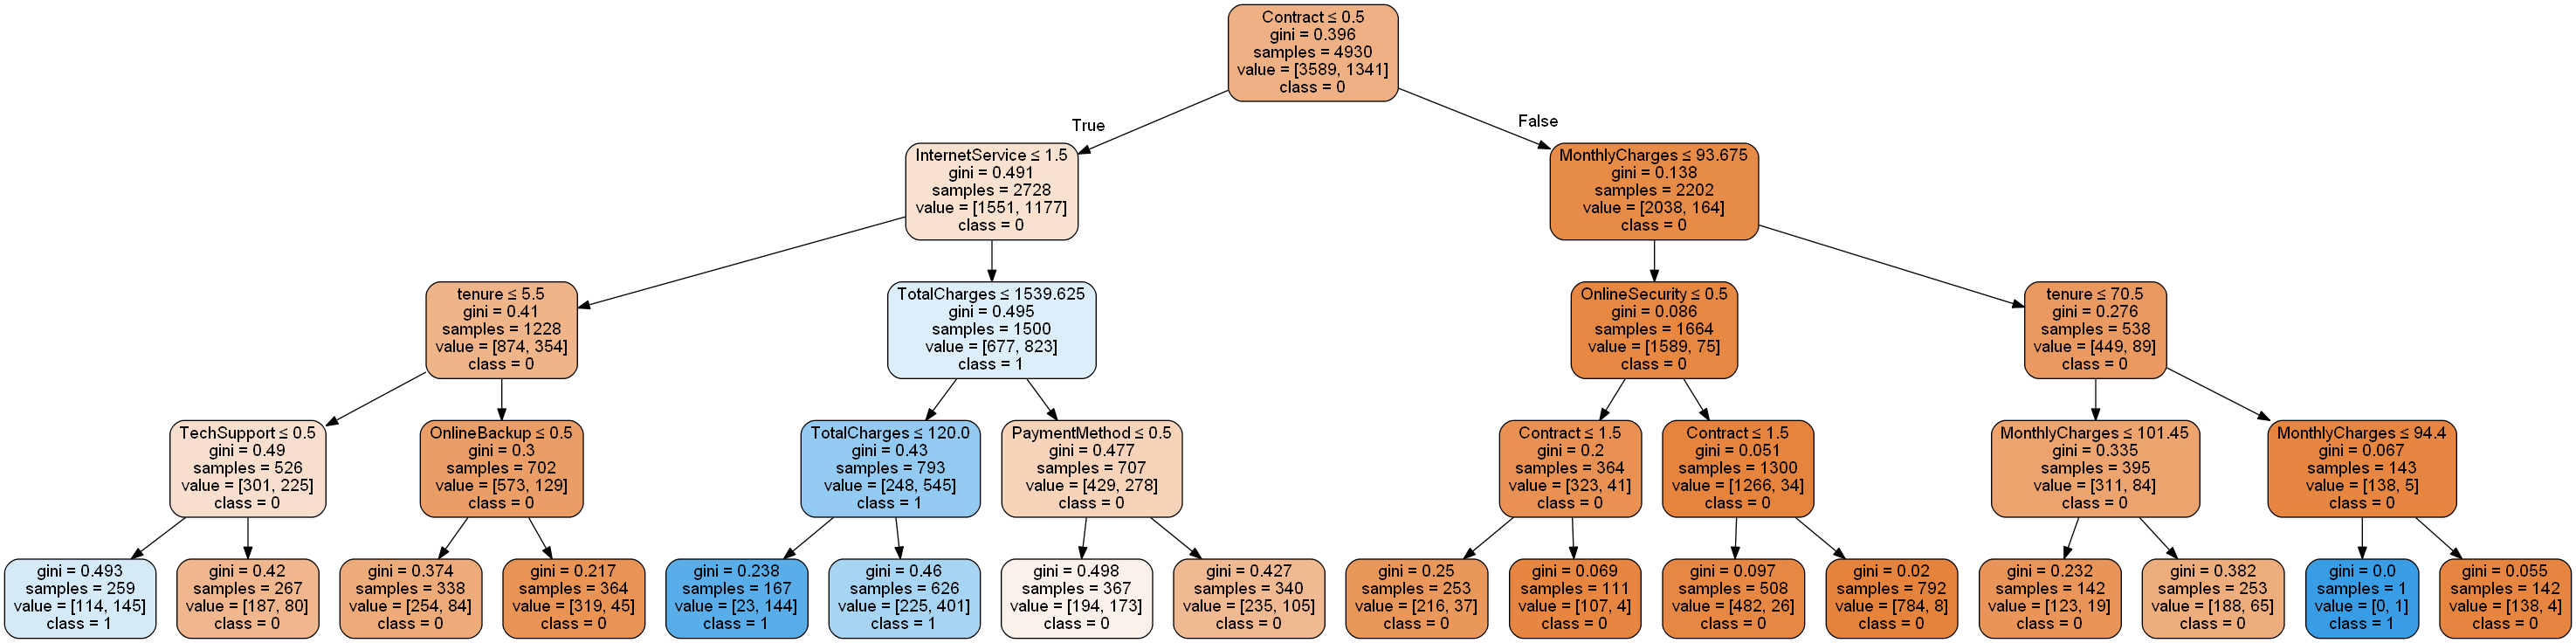

In [41]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('treeTelco2.png')
Image(graph.create_png())

#### Excellent!!! We pruned our tree to 4 levels, we got an increased accuracy (by 80%), and got decent tree!


Before deploying this model correct as the correct one, let's see the confusion matrix for this model and see if the unbalanced class for churn is affecting predictions (that is, number of *no_churn* rows much higher than *churn* rows).

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))  # true in rows and predicted in columns
print(conf_matrix)

precision_no_churn = conf_matrix.loc[0,0]/(conf_matrix.loc[0,0]+conf_matrix.loc[1,0])
print()
print("Precision No churn = "+"{:.1%}".format(precision_no_churn))

precision_churn = conf_matrix.loc[1,1]/(conf_matrix.loc[0,1]+conf_matrix.loc[1,1])
print()
print("Precision churn = "+"{:.1%}".format(precision_churn))

      0    1
0  1413  172
1   256  272

Precision No churn = 84.7%

Precision churn = 61.3%


Ok, we can see that predictions for *no churn* perform a lot better than thos for *churn*, so we might have a problem of unbalanced classes. Let's check.

In [44]:
df.groupby("Churn").size()

Churn
0    5174
1    1869
dtype: int64

We definitely have unbalnced class.We will have to resample our train/test dataframes to balance these classes and apply the classifier again.

Let's use the **resample** method from *sklearn*, upsampling in this case, that means, adding churn samples up to no_churn samples (credits to tutorials from [Elite Data Science](https://elitedatascience.com/imbalanced-classes)).

In [45]:
from sklearn.utils import resample

In [46]:
# Separate majority and minority classes
df_majority = df[df.Churn == 0]
df_minority = df[df.Churn == 1]

In [47]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5174,    # to match majority class
                                 random_state=456) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Churn.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    5174
0    5174
Name: Churn, dtype: int64

## Let's train and model again using balanced classes for *Churn*

In [48]:
X = df_upsampled[feature_cols] # Features
y = df_upsampled["Churn"] # Target variable# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)   #Let's keep a 4 depth level tree

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [49]:
# Model Accuracy, how often is the classifier correct?
x=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:"+"{:.2%}".format(x))

Accuracy:76.43%


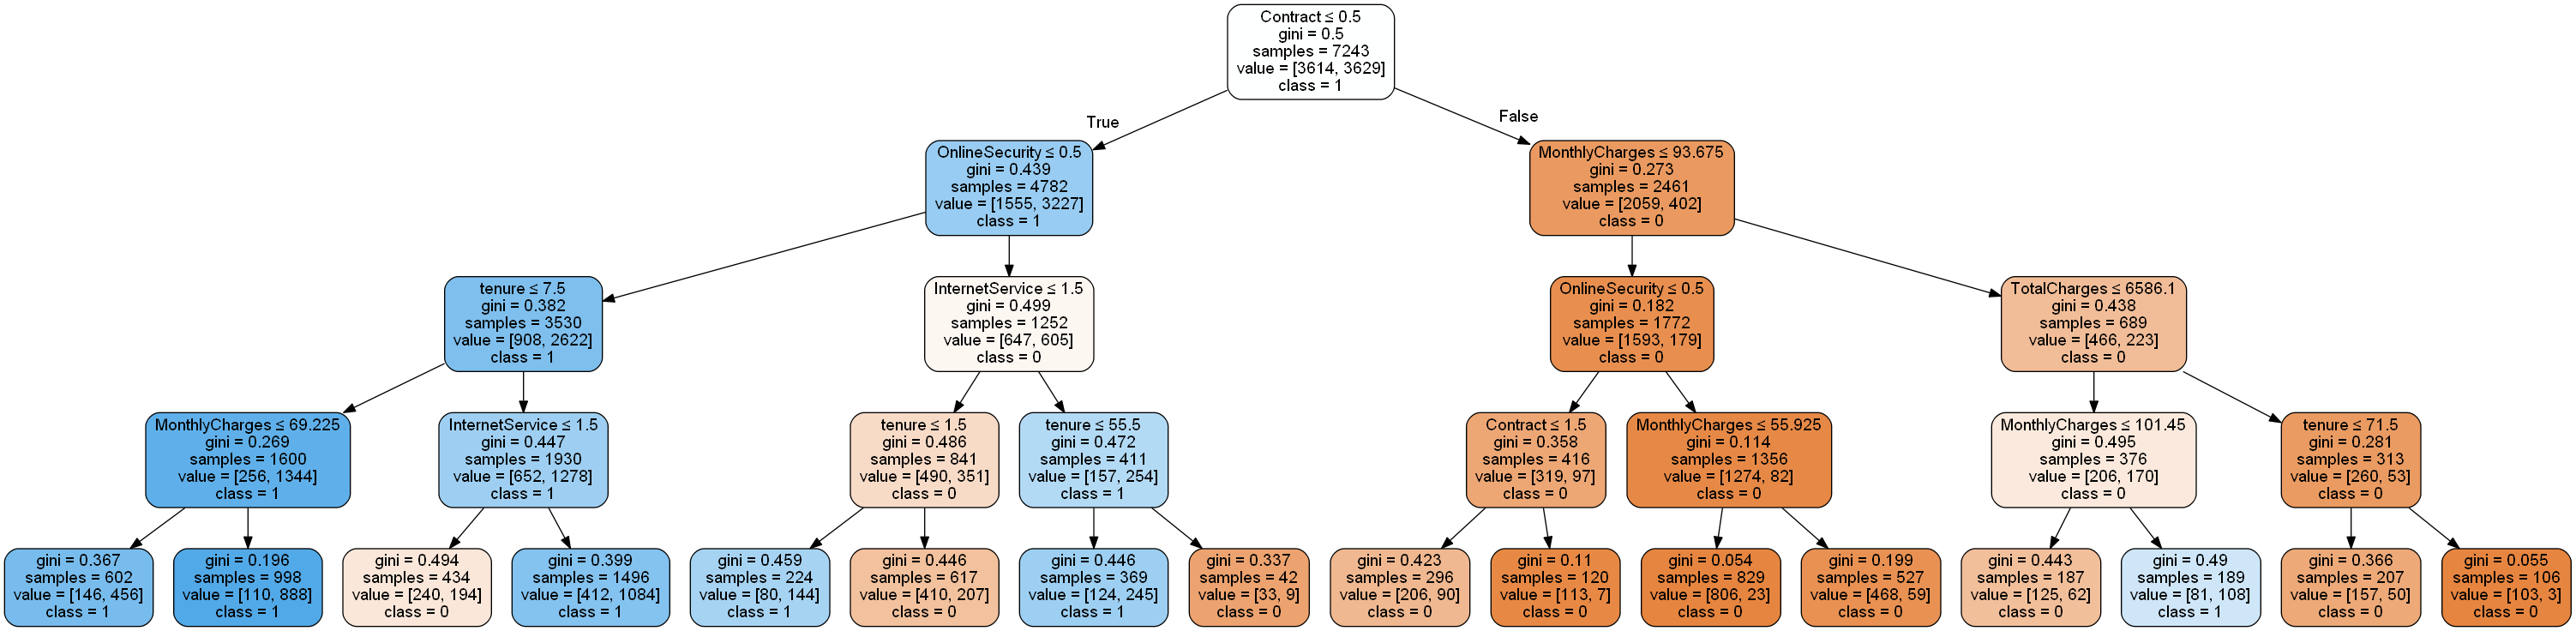

In [50]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('treeTelco3.png')
Image(graph.create_png())

Now let's see if we improve precision (and recall) using balanced classes...

In [51]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))  # true in rows and predicted in columns
print(conf_matrix)

precision_no_churn = conf_matrix.loc[0,0]/(conf_matrix.loc[0,0]+conf_matrix.loc[1,0])
print()
print("Precision No churn = "+"{:.1%}".format(precision_no_churn))

precision_churn = conf_matrix.loc[1,1]/(conf_matrix.loc[0,1]+conf_matrix.loc[1,1])
print()
print("Precision churn = "+"{:.1%}".format(precision_churn))

recall_no_churn = conf_matrix.loc[0,0]/(conf_matrix.loc[0,0]+conf_matrix.loc[0,1])
print()
print("Recall No churn, % of observations found = "+"{:.1%}".format(recall_no_churn))

recall_churn = conf_matrix.loc[1,1]/(conf_matrix.loc[1,0]+conf_matrix.loc[1,1])
print()
print("Recall churn, % of observations found  = "+"{:.1%}".format(recall_churn))

      0     1
0  1147   413
1   319  1226

Precision No churn = 78.2%

Precision churn = 74.8%

Recall No churn, % of observations found = 73.5%

Recall churn, % of observations found  = 79.4%


GOOD! we improved precision for *Churn* !!!

As we mentioned in previous EDA, we can see the effect in Churn if contract is *month-to-month*, if customer has no *Online Security contract*, and if *Fiber Optic* is customer's Internet Service type.

Hope you enjoyed this Notebook as much as I did!